In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

#### Phillips 2018 single-cell dataset (GSE98556, n = 546) 
##### False discovery rate calculations for different thresholds

In [5]:
# GSE98556 0.35, 2.5, 0.6
with open('Random-phillips-2/original.pairs') as f:
    original_lines = f.readlines()

fdr = []
for i in range(5):
    with open('Random-phillips-2/flu-' + str(i) + '.pairs') as f:
        lines = f.readlines()
        print("fdr :: ",i,len(lines)/len(original_lines))
        fdr.append(len(lines)/len(original_lines))

print(np.mean(fdr))

fdr ::  0 0.0009543762921343711
fdr ::  1 0.0009580214303041812
fdr ::  2 0.0009559869345814964
fdr ::  3 0.000953387301158066
fdr ::  4 0.0009541784939391101
0.000955190090423445


In [9]:
# GSE98556 0.35, 2.5, 0.05
with open('Random-phillips-1/original.pairs') as f:
    original_lines = f.readlines()

fdr = []
for i in range(5):
    with open('Random-phillips-1/flu-' + str(i) + '.pairs') as f:
        lines = f.readlines()
        print("fdr :: ",i,len(lines)/len(original_lines))
        fdr.append(len(lines)/len(original_lines))

print(np.mean(fdr))

fdr ::  0 0.0009501660162638153
fdr ::  1 0.000961751339129103
fdr ::  2 0.000964011889932086
fdr ::  3 0.0009532177598478423
fdr ::  4 0.0009592082194757472
0.0009576710449297188


In [48]:
# GSE98556 0.25, 2.5, 0.05
with open('Random-phillips/original.pairs') as f:
    original_lines = f.readlines()

fdr = []
for i in range(5):
    with open('Random-phillips/flu-' + str(i) + '.pairs') as f:
        lines = f.readlines()
        print("fdr :: ",i,len(lines)/len(original_lines))
        fdr.append(len(lines)/len(original_lines))

print(np.mean(fdr))

fdr ::  0 0.001048356991225785
fdr ::  1 0.001056197636446907
fdr ::  2 0.0010576403151675933
fdr ::  3 0.0010590516313073953
fdr ::  4 0.001058581192594128
0.0010559655533483616


In [16]:
# GSE98556 3, 0.1, 0.05
with open('Random-phillips/original.pairs') as f:
    original_lines = f.readlines()

fdr = []
for i in range(3):
    with open('Random-phillips/flu-' + str(i) + '.pairs') as f:
        lines = f.readlines()
        print("fdr :: ",i,len(lines)/len(original_lines))
        fdr.append(len(lines)/len(original_lines))

print(np.mean(fdr))

fdr ::  0 5.7199181753383197e-05
fdr ::  1 5.771799519332318e-05
fdr ::  2 5.681007167342821e-05
5.724241620671153e-05


##### General statistics

In [89]:
phillips_stats = pd.DataFrame(pd.read_csv("phillips-2018-retina-stats.txt", sep="\t", skiprows = 2, header = 0))
phillips_stats

AID  norel  lohi  lolo  \
0                                            NM_014048.1  14913     0     0   
1              NM_001159587.1,NM_001159588.1,NM_133493.1  12724     0  1194   
2                                            NM_015112.1  14914     0     0   
3      NM_001206833.1,NM_006388.1,NM_182709.1,NM_1827...  14900     0     0   
4                                            NM_024949.1  14866     0     0   
...                                                  ...    ...   ...   ...   
14911                                        NM_017553.1  13603     0     5   
14912                                        NM_015135.1  14910     0     0   
14913          NM_001006622.1,NM_001006623.1,NM_018383.1  14459     0   103   
14914                                        NM_030782.1  14402     0     0   
14915                                        NM_176816.1   7106   216  7291   

       hihi  hilo  eqv  opp  
0         1     2    0    0  
1       228   105  665    0  
2         0     2    0    0  
3        11     5    0    0  
4        38    12    0    0  
...     ...   ...  ...  ...  
14911  1232    75    1    0  
14912     6     0    0    0  
14913   350     3    1    0  
14914     7   507    0    0  
14915     2    78  203   20  

[14916 rows x 8 columns]

In [28]:
col_array = ["lohi", "lolo", "hihi", "hilo", "eqv", "opp"]
phillips_stats["total"] = phillips_stats.loc[:, col_array].sum(axis=1)
print(sum(phillips_stats["total"])//2)

35389605


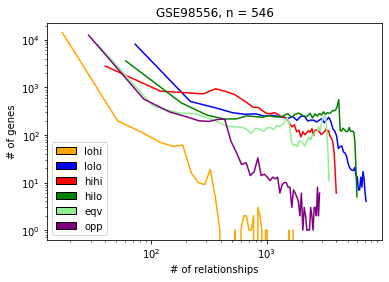

In [127]:
# Added to figure S1
fig,ax = plt.subplots()
col_array = ["lohi", "lolo", "hihi", "hilo", "eqv", "opp"]
colors = ["orange", "blue", "red", "green", "#90EE90", "purple"]
#colors = ["#00CC00", "#D8A03D","#EC008C",'cyan', "#B741DC", "#808285"]

for i in range(len(col_array)):
    phillips_BIN_stats = phillips_stats.loc[:, col_array[i]]
    counts,bins,bars = plt.hist(phillips_BIN_stats, bins = 50, histtype=u'step')
    bin_centers = 0.5*(bins[1:]+bins[:-1])
    plt.plot(bin_centers, counts, colors[i]) ## using bin_centers rather than edges
    t = [b.remove() for b in bars]

handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
plt.legend(handles, col_array)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel('# of genes')
ax.set_xlabel('# of relationships')
ax.set_title('GSE98556, n = 546')
plt.show()

phillips_stats_pdf = PdfPages("phillips_stats.pdf")
phillips_stats_pdf.savefig(fig)
phillips_stats_pdf.close()

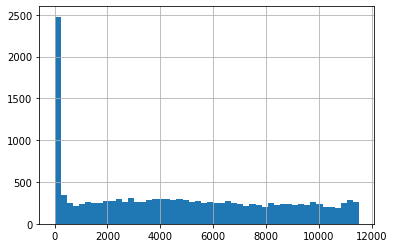

In [42]:
phillips_stats["total"].hist(bins=50)

#### Macosko 2015 single-cell dataset (GSE63472, n = 49,300) 
##### False discovery rate calculations for different thresholds

In [12]:
# GSE63472 2.5, 0.35, 0.6
with open('Random-macosko-1/original.pairs') as f:
    original_lines = f.readlines()

fdr = []
for i in range(5):
    with open('Random-macosko-1/flu-' + str(i) + '.pairs') as f:
        lines = f.readlines()
        print("fdr :: ",i,len(lines)/len(original_lines))
        fdr.append(len(lines)/len(original_lines))

print(np.mean(fdr))

fdr ::  0 0.04641132116882353
fdr ::  1 0.04651946899417751
fdr ::  2 0.0465385539045341
fdr ::  3 0.04674742764565895
fdr ::  4 0.04640416432743981
0.046524187208126774


In [13]:
# GSE63472 2.5, 0.35, 0.05
with open('Random-macosko-2/original.pairs') as f:
    original_lines = f.readlines()

fdr = []
for i in range(5):
    with open('Random-macosko-2/flu-' + str(i) + '.pairs') as f:
        lines = f.readlines()
        print("fdr :: ",i,len(lines)/len(original_lines))
        fdr.append(len(lines)/len(original_lines))

print(np.mean(fdr))

fdr ::  0 0.04675909064643242
fdr ::  1 0.04656134976968224
fdr ::  2 0.046528216244757614
fdr ::  3 0.04647944369606856
fdr ::  4 0.04660667643177913
0.04658695535774399


In [129]:
# GSE63472 3, 0.1, 0.05
with open('Random-macosko/original.pairs') as f:
    original_lines = f.readlines()

fdr = []
for i in range(2):
    with open('Random-macosko/flu-' + str(i) + '.pairs') as f:
        lines = f.readlines()
        print("fdr :: ",i,len(lines)/len(original_lines))
        fdr.append(len(lines)/len(original_lines))

print(np.mean(fdr))

fdr ::  0 0.01835299953258993
fdr ::  1 0.018146957541995364
0.018249978537292648


##### General statistics

In [29]:
macosko_stats = pd.DataFrame(pd.read_csv("Macosko-2015-retina-mm-stats.txt", sep="\t", skiprows = 2, header = 0))
macosko_stats

AID  norel  lohi  lolo  hihi  hilo  eqv  opp
0               KITL  15054     0    65   142   440    0    0
1              TMTC3  15357     0     0   104   240    0    0
2             CEP290  11736     0  1149    59  2757    0    0
3      4930430F08RIK  15505     0     0   176    20    0    0
4             MGAT4C  14626     0     0   478   597    0    0
...              ...    ...   ...   ...   ...   ...  ...  ...
15696          KDM5D  15571     0     0   120    10    0    0
15697         RPL39L  15662     0     0    38     1    0    0
15698        GM10709  15699     0     0     1     1    0    0
15699        VAX2OS1  15652     0     0    31    18    0    0
15700          MIMT1  15691     0     0     5     5    0    0

[15701 rows x 8 columns]

In [30]:
col_array = ["lohi", "lolo", "hihi", "hilo", "eqv", "opp"]
macosko_stats["total"] = macosko_stats.loc[:, col_array].sum(axis=1)
print(sum(macosko_stats["total"])//2)

3772614


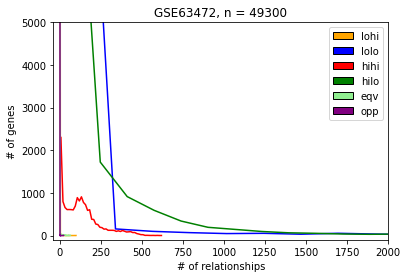

In [132]:
fig,ax = plt.subplots()
col_array = ["lohi", "lolo", "hihi", "hilo", "eqv", "opp"]
colors = ["orange", "blue", "red", "green", "#90EE90", "purple"]

for i in range(len(col_array)):
    phillips_BIN_stats = macosko_stats.loc[:, col_array[i]]
    counts,bins,bars = plt.hist(phillips_BIN_stats, bins = 50, histtype=u'step')
    bin_centers = 0.5*(bins[1:]+bins[:-1])
    plt.plot(bin_centers, counts, colors[i]) ## using bin_centers rather than edges
    t = [b.remove() for b in bars]

handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
plt.legend(handles, col_array)
plt.ylim(-100, 5000)
plt.xlim(-40, 2000)
ax.set_ylabel('# of genes')
ax.set_xlabel('# of relationships')
ax.set_title('GSE63472, n = 49300')
plt.show()

macosko_stats_pdf = PdfPages("macosko_stats.pdf")
macosko_stats_pdf.savefig(fig)
macosko_stats_pdf.close()

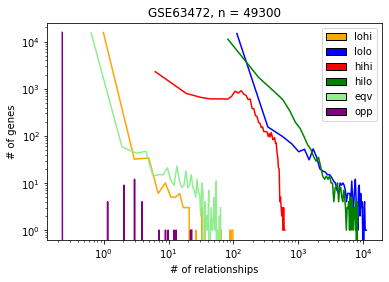

In [133]:
fig,ax = plt.subplots()
col_array = ["lohi", "lolo", "hihi", "hilo", "eqv", "opp"]
colors = ["orange", "blue", "red", "green", "#90EE90", "purple"]

for i in range(len(col_array)):
    phillips_BIN_stats = macosko_stats.loc[:, col_array[i]]
    counts,bins,bars = plt.hist(phillips_BIN_stats, bins = 50, histtype=u'step')
    bin_centers = 0.5*(bins[1:]+bins[:-1])
    plt.plot(bin_centers, counts, colors[i]) ## using bin_centers rather than edges
    t = [b.remove() for b in bars]

handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
plt.legend(handles, col_array)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel('# of genes')
ax.set_xlabel('# of relationships')
ax.set_title('GSE63472, n = 49300')
plt.show()

macosko_stats_pdf = PdfPages("macosko_stats.pdf")
macosko_stats_pdf.savefig(fig)
macosko_stats_pdf.close()